<a href="https://colab.research.google.com/github/palash-21/Netflix-Movies-And-TV-Shows-EDA-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#1 Data Loading and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime as dt
from wordcloud import WordCloud, STOPWORDS
!pip install rake-nltk
from rake_nltk import Rake
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.5 MB 27.0 MB/s 
     |████████████████████████████████| 749 kB 42.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Netflix Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
print('Number of entries and features :',netflix_df.shape)
netflix_df.head()

Number of entries and features : (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Checking for duplicates
netflix_df.duplicated(subset=['title']).value_counts()

False    7787
dtype: int64

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


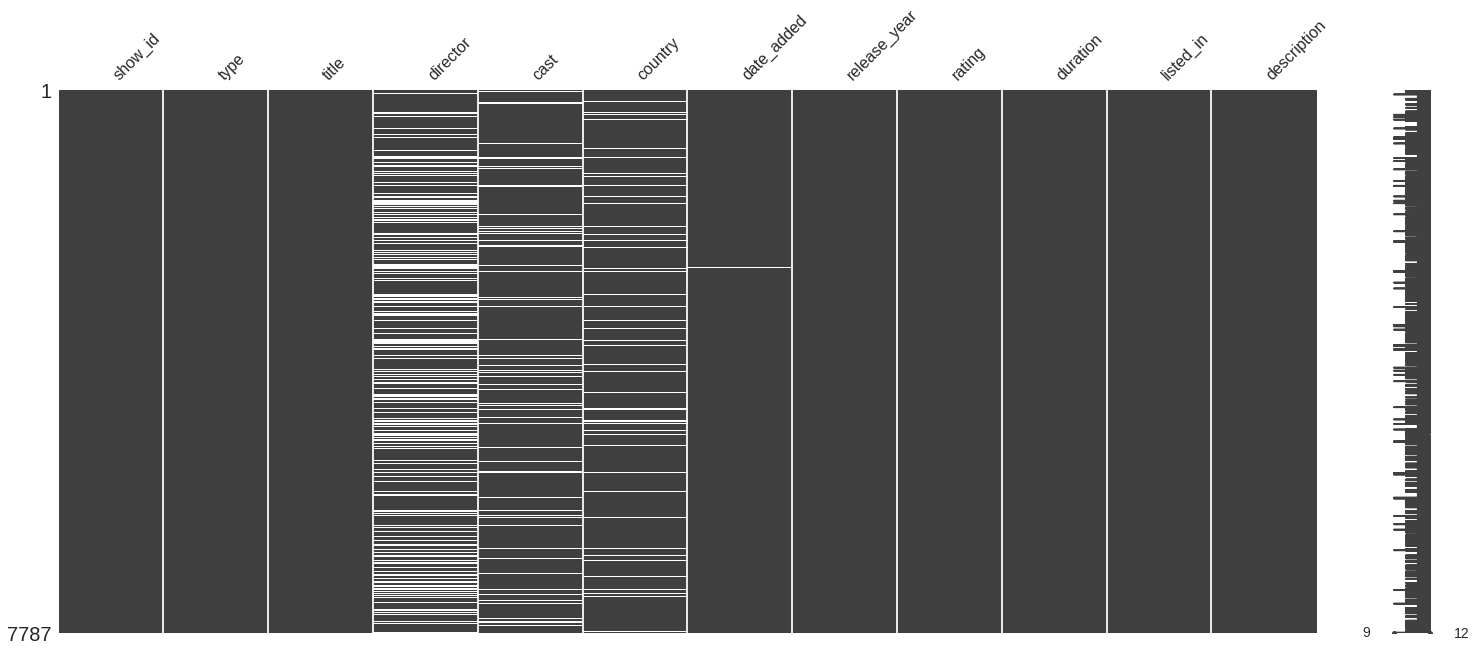

In [ ]:
msno.matrix(netflix_df)

In [ ]:
#We can see from the info output and missing na mattrix that we have 5 columns with missing values
#Lets check these values as percentages.

netflix_df.isnull().sum()/len(netflix_df.index)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

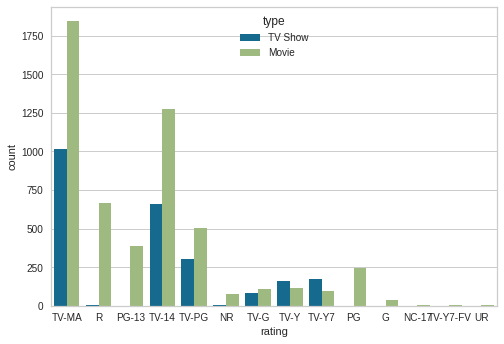

In [ ]:
# Rating
sns.countplot(netflix_df['rating'],hue=netflix_df['type'])

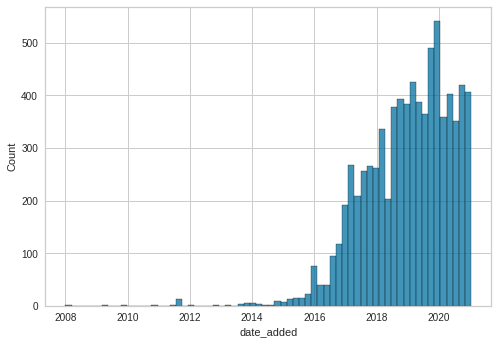

In [ ]:
# Date added
# Converting the string into datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
sns.histplot(netflix_df['date_added'])

In [ ]:
# As rating and date_added features have very low perc of null values, we will replace nulls with the majority/mode
# Majority of ratings are TV-MA for both Movies and TV Shows
# Mode for  date added is 1st Jan 2020
netflix_df.loc[netflix_df['rating'].isna(),'rating']= netflix_df['rating'].mode()[0]
netflix_df.loc[netflix_df['date_added'].isna(),'date_added']= netflix_df['date_added'].mode()[0]

In [ ]:
# Country, Cast and Director have high nulls values 
# We will replace nulls with empty string for further use 
# Before doing that we will store the non-null entries for EDA
cast_no_na_df=netflix_df[~netflix_df['cast'].isna()]
country_no_na_df=netflix_df[~netflix_df['country'].isna()]
director_no_na_df=netflix_df[~netflix_df['director'].isna()]
netflix_df.loc[netflix_df['cast'].isna(),'cast'] = ''
netflix_df.loc[netflix_df['country'].isna(),'country'] = ''
netflix_df.loc[netflix_df['director'].isna(),'director'] = ''

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


#1.1 IMDB dataset

We got the imdb datset from imdb official website which is available for non-commercial use
There were lost of datasets on imdb , we will load two of them and extract required features.
1. "title.basics.tsv.gz" - here we take a title of the movie and release year
2. "title.ratings.tsv.gz" - here we take ratings for the titles

In [ ]:
# Loading both the datasets
# For reading a tsv(tab-separated values), we will just mention seperator as tab
imdb_basics_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Netflix Clustering/basics.tsv", 
                           usecols=["tconst", 'titleType',"originalTitle", "startYear"], sep='\t')
print('Number of entries and features :',imdb_basics_df.shape)
imdb_basics_df.head()

Number of entries and features : (8694425, 4)


,tconst,titleType,originalTitle,startYear
0,tt0000001,short,Carmencita,1894
1,tt0000002,short,Le clown et ses chiens,1892
2,tt0000003,short,Pauvre Pierrot,1892
3,tt0000004,short,Un bon bock,1892
4,tt0000005,short,Blacksmith Scene,1893


In [ ]:
imdb_ratings_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Netflix Clustering/ratings.tsv", 
                            usecols=["tconst", "averageRating"],sep='\t')
print('Number of entries and features :',imdb_ratings_df.shape)
imdb_ratings_df.head()

Number of entries and features : (1213727, 2)


,tconst,averageRating
0,tt0000001,5.7
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,6.0
4,tt0000005,6.2


In [ ]:
# Merging both files
imdb_df = pd.merge(imdb_basics_df,imdb_ratings_df,how='inner',on='tconst')
print('Number of entries and features :',imdb_df.shape)
imdb_df.head()

Number of entries and features : (1213713, 5)


,tconst,titleType,originalTitle,startYear,averageRating
0,tt0000001,short,Carmencita,1894,5.7
1,tt0000002,short,Le clown et ses chiens,1892,6.0
2,tt0000003,short,Pauvre Pierrot,1892,6.5
3,tt0000004,short,Un bon bock,1892,6.0
4,tt0000005,short,Blacksmith Scene,1893,6.2


In [ ]:
imdb_df['titleType'].value_counts()

tvEpisode       583930
movie           274650
short           139214
tvSeries         80080
video            49086
tvMovie          48310
tvMiniSeries     12946
videoGame        12892
tvSpecial        10198
tvShort           2407
Name: titleType, dtype: int64

In [ ]:
imdb_title_dict = {'tvEpisode':'TV Show','movie':'Movie','short':'other','tvSeries':'TV Show','video':'other',
                   'tvMovie':'other','tvMiniSeries':'other','videoGame':'other','tvSpecial':'other','tvShort':'other'}
imdb_df['type'] = imdb_df['titleType'].apply(lambda x: imdb_title_dict[x])
imdb_df.drop(columns=['tconst','titleType'],inplace=True)
imdb_df = imdb_df[imdb_df['type']!='other']
imdb_df.head()

,originalTitle,startYear,averageRating,type
339,Bohemios,1905,4.5,Movie
373,The Story of the Kelly Gang,1906,6.1,Movie
382,L'enfant prodigue,1907,5.2,Movie
396,Robbery Under Arms,1907,4.5,Movie
404,Amleto,1908,3.8,Movie


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938660 entries, 339 to 1213712
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   originalTitle  938660 non-null  object 
 1   startYear      938660 non-null  object 
 2   averageRating  938660 non-null  float64
 3   type           938660 non-null  object 
dtypes: float64(1), object(3)
memory usage: 35.8+ MB


In [ ]:
imdb_df['startYear'].unique()

array([1905, 1906, 1907, 1908, 1909, 1910, 1912, 1911, 1913, 1919, 1914,
       1917, 1916, 1915, 1936, 1925, 1918, 1920, 1921, 2019, 1924, 1923,
       2021, 1922, 1927, 1929, 2000, 1926, 1993, 1935, 1928, 1942, 1930,
       1932, 1931, 1939, 1937, 1950, 1933, 1938, 1951, 1934, 1946, 1996,
       1940, 1944, 1947, 1941, 1952, 1970, 1957, 1943, 1948, 1945, 2001,
       1949, 1953, 1954, 1965, 1983, 1980, 1973, 1961, 1955, 1962, 1958,
       1956, 1977, 1964, 1960, 1959, 1967, 1963, 1968, 1971, 1969, 1972,
       1966, 1976, 1990, 1979, 1981, 2020, 1978, 2012, 1989, 1974, 1975,
       1986, '1971', '1972', '1970', '1973', '1976', '1969', '1981',
       '1968', '1974', '1985', '1986', '1987', '1975', '1965', '1978',
       '1967', '1990', '1980', '2018', '1979', '1977', '1984', '1966',
       '1983', '1982', '\\N', '1991', '1988', '1963', '2001', '1992',
       '1989', '1993', '1964', '1957', '2019', '1999', '2005', '1953',
       '1994', '2004', '1998', '2020', '1947', '2016', '2002', '

In [ ]:
imdb_df = imdb_df[imdb_df['startYear']!='\\N']

In [ ]:
imdb_df['originalTitle'] = imdb_df['originalTitle'].astype(str)
imdb_df['originalTitle']= imdb_df['originalTitle'].apply(lambda x: x.lower())
imdb_df['startYear']= imdb_df['startYear'].astype(int)
imdb_df['type']= imdb_df['type'].astype(str)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [ ]:
netflix_df['title'] = netflix_df['title'].astype(str)
netflix_df['title']= netflix_df['title'].apply(lambda x: x.lower())
netflix_df['type'] = netflix_df['type'].astype(str)

In [ ]:
# Now we will use both title and year to match our movies/shows from netflix and imdb
df = pd.merge(left=netflix_df,right=imdb_df,how='left',left_on=['type','title','release_year'],right_on=['type','originalTitle','startYear'])
print('Number of entries and features :',df.shape)
df.head()           

Number of entries and features : (7949, 15)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,originalTitle,startYear,averageRating
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,NaN,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,7:19,2016.0,5.9
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",23:59,2011.0,4.6
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9,2009.0,7.1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,21,2008.0,6.8


In [ ]:
df.drop(columns=['originalTitle','startYear'],inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,5.9
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8


In [ ]:
df.rename(columns={'averageRating':'imdb_ratings'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 0 to 7948
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7949 non-null   object        
 1   type          7949 non-null   object        
 2   title         7949 non-null   object        
 3   director      7949 non-null   object        
 4   cast          7949 non-null   object        
 5   country       7949 non-null   object        
 6   date_added    7949 non-null   datetime64[ns]
 7   release_year  7949 non-null   int64         
 8   rating        7949 non-null   object        
 9   duration      7949 non-null   object        
 10  listed_in     7949 non-null   object        
 11  description   7949 non-null   object        
 12  imdb_ratings  4137 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 869.4+ KB


#2 EDA

# 2.1 Uni-variate Analysis

In [ ]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787.000000,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1512,NaN,14,216,492,7769
top,s1,Movie,3%,,,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,129,NaN,2870,1608,334,3
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


In [ ]:
# Cheking the unique values for diff features
for col in ['type','rating','release_year']:
  print(col,netflix_df[col].unique(),'\n')

type ['TV Show' 'Movie'] 

rating ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR'] 

release_year [2020 2016 2011 2009 2008 2019 1997 2017 2018 2014 2015 2010 2005 2013
 2012 2006 2000 2003 1989 2004 1977 1971 1993 2007 1998 1988 1996 2002
 1986 1990 1979 1980 1974 2001 1999 1966 1991 1982 1994 1995 1978 1992
 1972 1975 2021 1973 1967 1960 1981 1958 1976 1968 1956 1985 1965 1984
 1983 1987 1945 1946 1962 1925 1942 1969 1955 1963 1964 1954 1970 1944
 1947 1959 1943] 



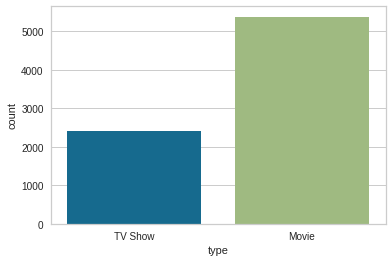

In [ ]:
# Movies vs TV Shows
sns.countplot(netflix_df['type'])

So, majority of entries are movies. 

In [ ]:
# Making movies and tv show dataset for further use.
netflix_movie_df = netflix_df[netflix_df['type']=='Movie'].copy()
netflix_tvshow_df = netflix_df[netflix_df['type']=='TV Show'].copy()

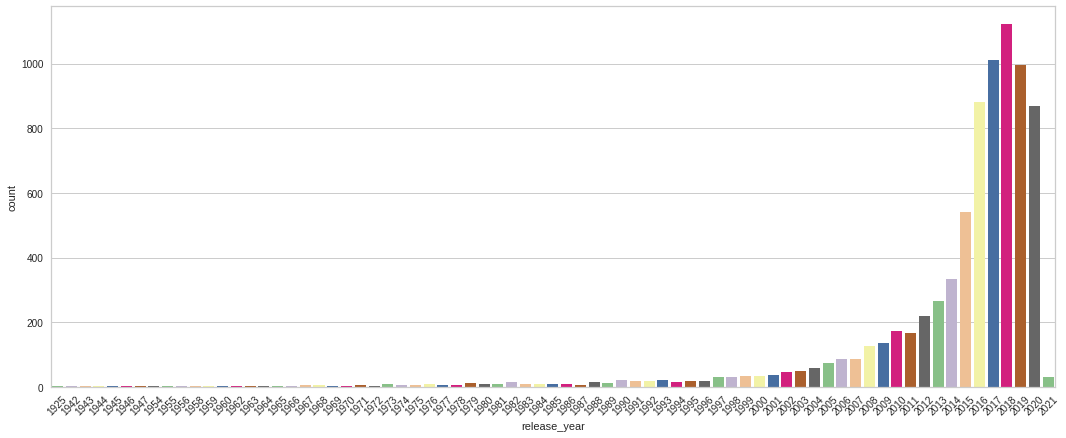

In [ ]:
plt.figure(figsize = (18, 7))
plt.xticks(rotation = 45)
sns.countplot(netflix_df['release_year'],palette = "Accent")

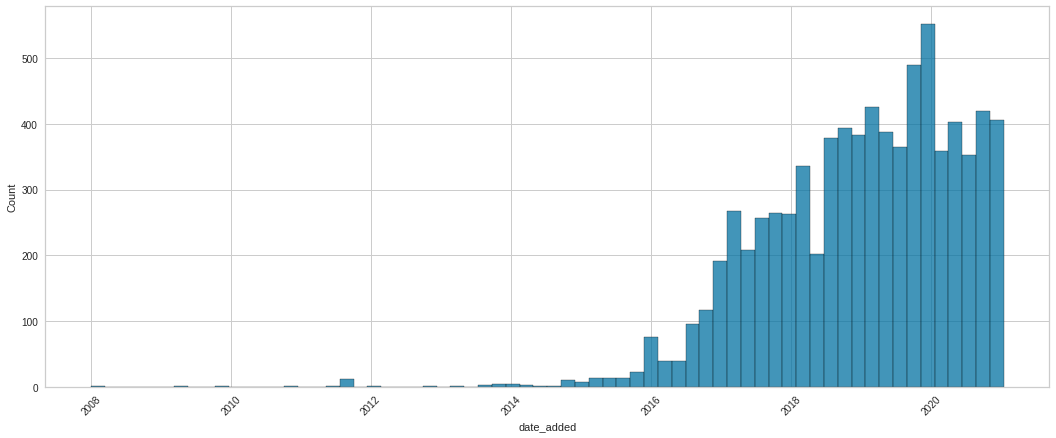

In [ ]:
plt.figure(figsize = (18, 7))
plt.xticks(rotation = 45)
sns.histplot(netflix_df['date_added'])

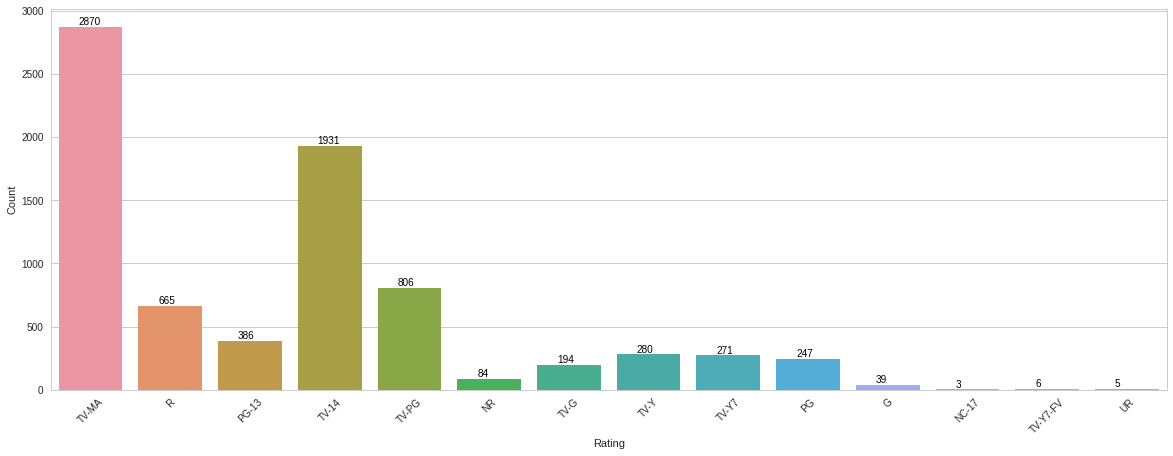

In [ ]:
plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [ ]:
# Making a function to return most frequent entities like genre,actor,director,etc

def GetTopN(type,feature,n,df):

  # Checking the type movie/tvshow
  df_1 = df[df['type']==type]
  

  # Getting the complete list 
  list_of_values = [x.strip() for x in ','.join(df_1[feature]).split(',')]

  # Converting into series
  series_of_values = pd.Series(list_of_values)

  # Returning the top N values according to their frequencies
  top_n_value_counts = series_of_values.value_counts()[:n]
  return top_n_value_counts

# Function to plot top n values
def PlotTopN(type,feature,n,value_counts_series,title):

  # Visualize using seaborn's barplot
  plt.figure(figsize=(15,10))
  sns.set_context(font_scale = 1.5)
  ax = sns.barplot(x = value_counts_series.index, y = value_counts_series)
  plt.title(f'Top {n} {title} for Netflix {type}')
  plt.ylabel('Count')
  plt.xlabel(feature)
  plt.xticks(rotation = 45);

  # add text to each bar
  initialx = 0
  for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 3, .08 + p.get_height(), int(p.get_height()))

In [ ]:
# Function to get wordcloud of a feature like genre,title,etc.

def GetWordCloud(feature,df,ignore,type):
  text = " ".join(txt for txt in df[feature])
  word_cloud = WordCloud(collocations = False,background_color = 'white', stopwords=ignore).generate(text)
  plt.figure(figsize = (10, 6))
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.title(f'Word Cloud for {type} {feature}')
  plt.axis("off")
  plt.show()

In [ ]:
# Working with genre (listed-in) column
netflix_df['listed_in'].nunique()

492

In [ ]:
netflix_df['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
#Top 10 genre for Movies
top_10_movie_genres_count = GetTopN('Movie','listed_in',10,netflix_df)
top_10_movie_genres_count

International Movies        2437
Dramas                      2106
Comedies                    1471
Documentaries                786
Action & Adventure           721
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Thrillers                    491
Stand-Up Comedy              329
dtype: int64

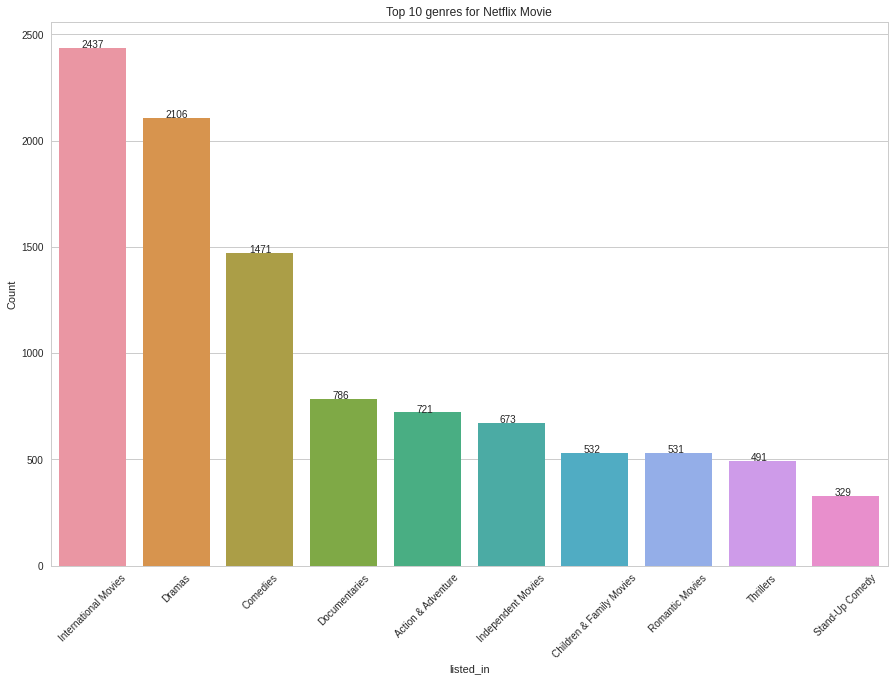

In [ ]:
# Plot for Top 10 genre for Movies
PlotTopN('Movie','listed_in',10,top_10_movie_genres_count,'genres')

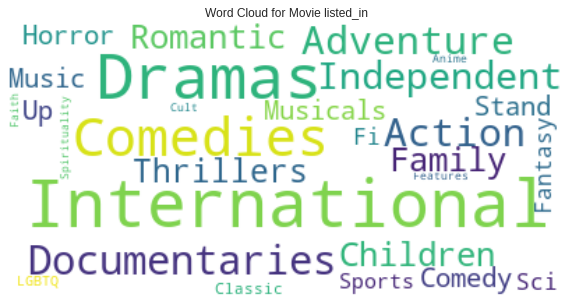

In [ ]:
# Word Cloud for movie genres
# Keeping words movies in stop words set
ignore_set = {'Movies'}
GetWordCloud('listed_in',netflix_movie_df,ignore_set,'Movie')

In [ ]:
#Top 10 genre for Tv shows
top_10_tvshow_genres_count = GetTopN('TV Show','listed_in',10,netflix_df)
top_10_tvshow_genres_count

International TV Shows    1199
TV Dramas                  704
TV Comedies                525
Crime TV Shows             427
Kids' TV                   414
Docuseries                 353
Romantic TV Shows          333
British TV Shows           232
Reality TV                 222
Korean TV Shows            150
dtype: int64

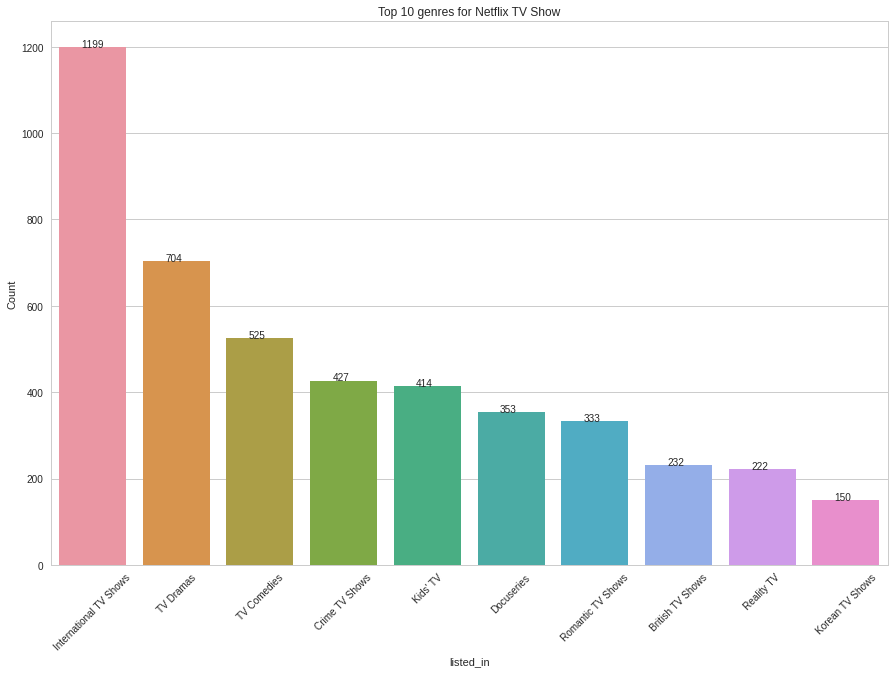

In [ ]:
# Plot for Top 10 genre for Tv shows
PlotTopN('TV Show','listed_in',10,top_10_tvshow_genres_count,'genres')

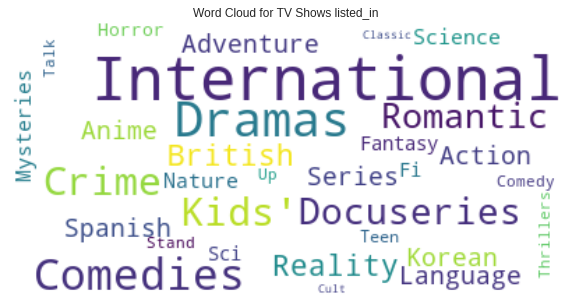

In [ ]:
# Word Cloud for TV shows genres
# Keeping words tv shows in stop words set
ignore_set = {'TV','Shows'}
GetWordCloud('listed_in',netflix_tvshow_df,ignore_set,'TV Shows')

In [ ]:
#working with cast column
# We will use the null filtered df here
cast_no_na_df['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [ ]:
#Top 10 Actors for Movies
top_10_actors_movie_count = GetTopN('Movie','cast',10,cast_no_na_df)
top_10_actors_movie_count

Anupam Kher         41
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Akshay Kumar        29
Paresh Rawal        27
Amitabh Bachchan    27
Boman Irani         27
Kareena Kapoor      25
Ajay Devgn          21
dtype: int64

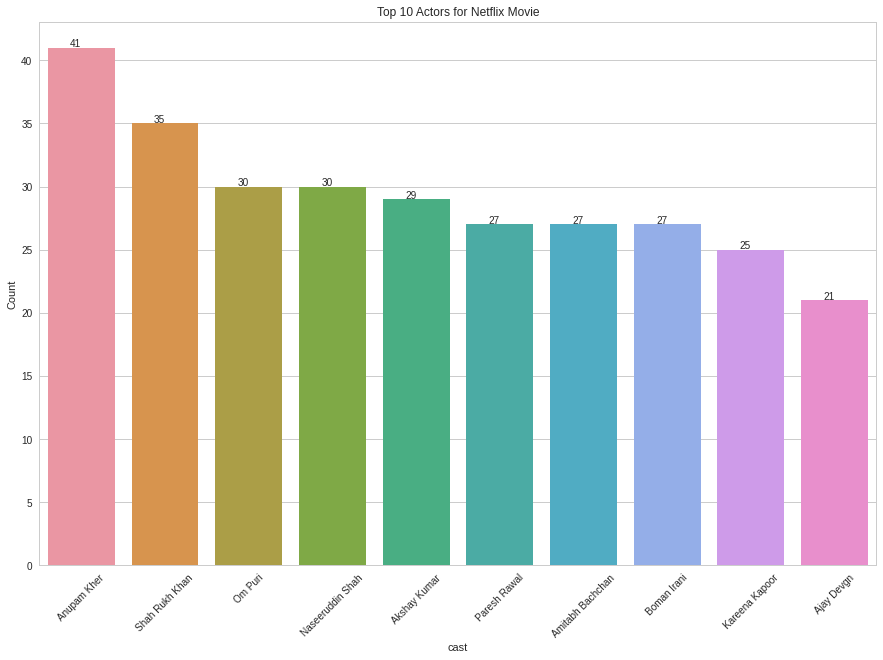

In [ ]:
# Plot for Top 10 Actors vs count for Movies
PlotTopN('Movie','cast',10,top_10_actors_movie_count,'Actors')

In [ ]:
#Top 10 actors for Tv shows
top_10_actors_tvshow_count = GetTopN('TV Show','cast',10,cast_no_na_df)
top_10_actors_tvshow_count

Takahiro Sakurai    22
Yuki Kaji           17
Daisuke Ono         16
Ai Kayano           16
Junichi Suwabe      15
Yoshimasa Hosoya    14
Yuichi Nakamura     14
Vincent Tong        13
Kana Hanazawa       13
Jun Fukuyama        13
dtype: int64

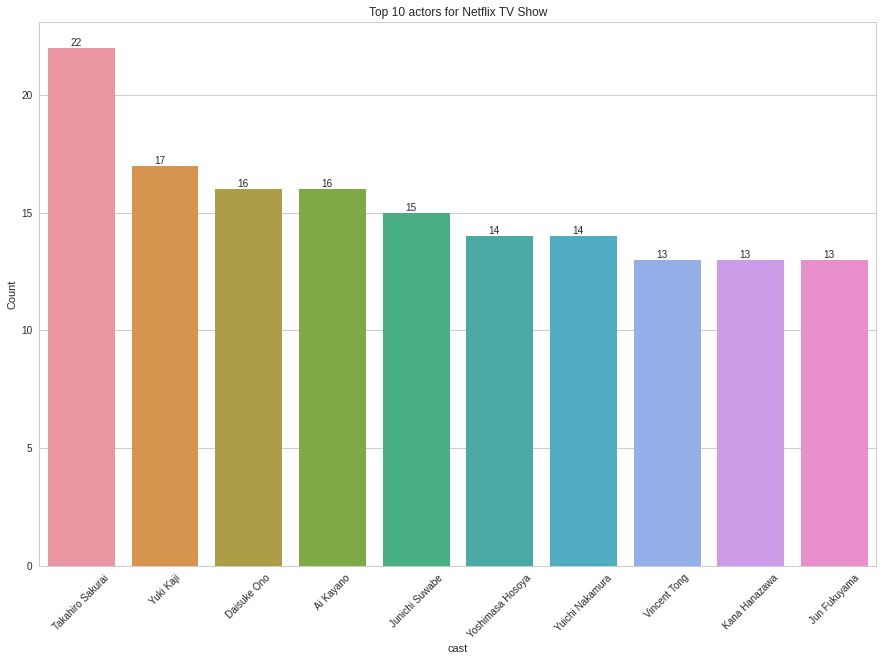

In [ ]:
# Plot for Top 10 actors for Tv shows
PlotTopN('TV Show','cast',10,top_10_actors_tvshow_count,'actors')

In [ ]:
#working with director column
director_no_na_df['director'][1]

'Jorge Michel Grau'

In [ ]:
#Top 10 Directors for Movies
top_10_directors_movie_count = GetTopN('Movie','director',10,director_no_na_df)
top_10_directors_movie_count

Jan Suter              21
Raúl Campos            19
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Steven Spielberg       10
David Dhawan            9
dtype: int64

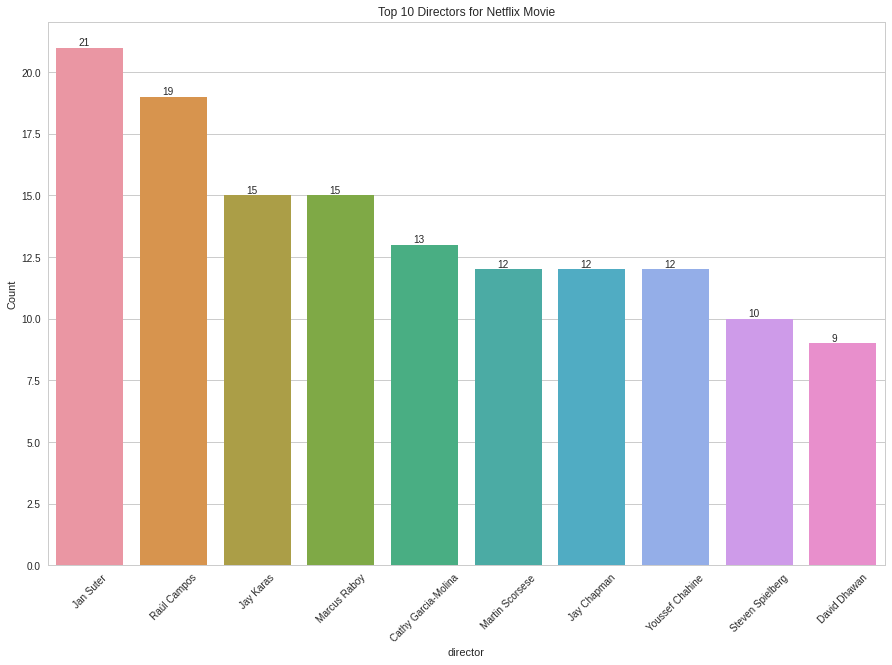

In [ ]:
# Plot for Top 10 Directors vs count for Movies
PlotTopN('Movie','director',10,top_10_directors_movie_count,'Directors')

In [ ]:
#Top 10 directors for Tv shows
top_10_directors_tvshow_count = GetTopN('TV Show','director',10,director_no_na_df)
top_10_directors_tvshow_count

Alastair Fothergill    3
Ken Burns              3
Iginio Straffi         2
Lynn Novick            2
Jung-ah Im             2
Shin Won-ho            2
Stan Lathan            2
Rob Seidenglanz        2
Alexx Media            1
He Xiaofeng            1
dtype: int64

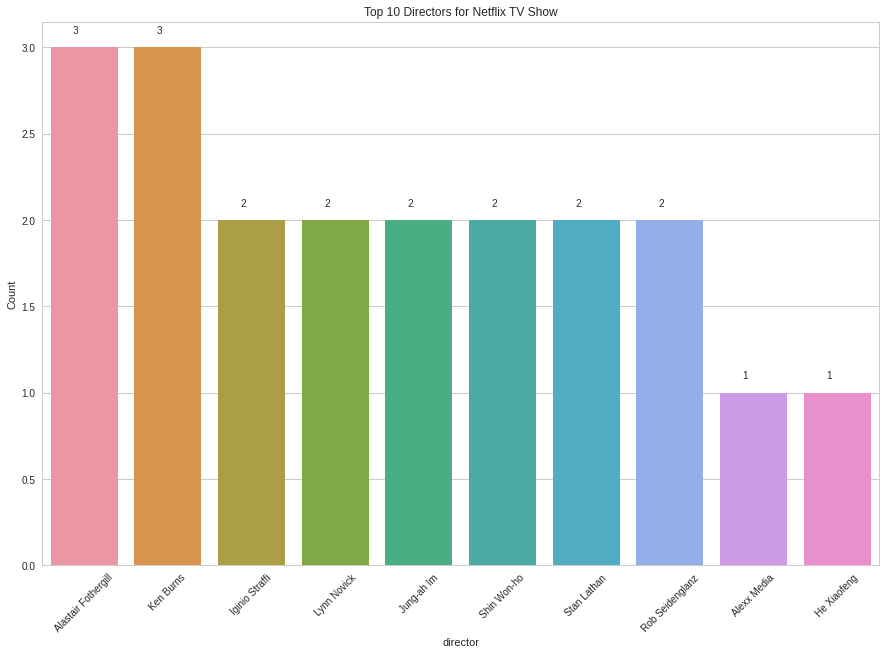

In [ ]:
# Plot for Top 10 directors for Tv shows
PlotTopN('TV Show','director',10,top_10_directors_tvshow_count,'Directors')

Text(0.5, 0, 'Type')

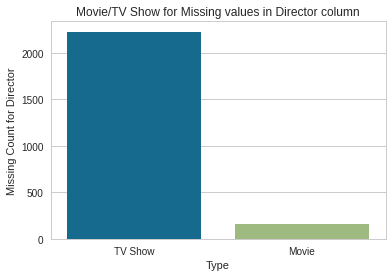

In [ ]:
# The top directors for TV shows seems to have made very few shows, lets check why
# Checking the missing values
# As we have replace null values for director with empty strings
sns.countplot(netflix_df[netflix_df['director']=='']['type'])
plt.title('Movie/TV Show for Missing values in Director column')
plt.ylabel('Missing Count for Director')
plt.xlabel('Type')

As we had checked initially, director column has 30% null values, out of which we can now confirm that most of them are for TV shows and very few for movies.
Hence , we have very few info about directors for TV shows

In [ ]:
# Working with duration column
print(netflix_movie_df['duration'].value_counts())
print(netflix_tvshow_df['duration'].value_counts())

90 min     136
93 min     131
91 min     125
94 min     125
95 min     119
          ... 
214 min      1
182 min      1
224 min      1
233 min      1
191 min      1
Name: duration, Length: 201, dtype: int64
1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
13 Seasons       2
12 Seasons       2
15 Seasons       2
16 Seasons       1
Name: duration, dtype: int64


Text(0.5, 1.0, 'Movie Duration')

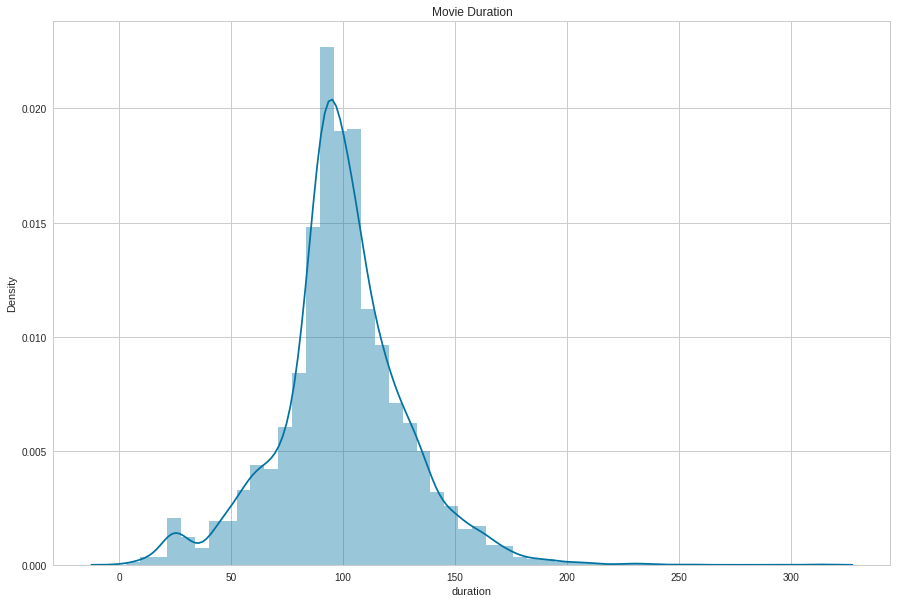

In [ ]:
# Distribution Plot for movie duration 
# Converting duration into integer for movies
plt.figure(figsize=(15,10))
sns.distplot(netflix_movie_df['duration'].str.replace(" min", "").astype(int))
plt.title('Movie Duration')

Text(0.5, 1.0, 'TV Show Seasons')

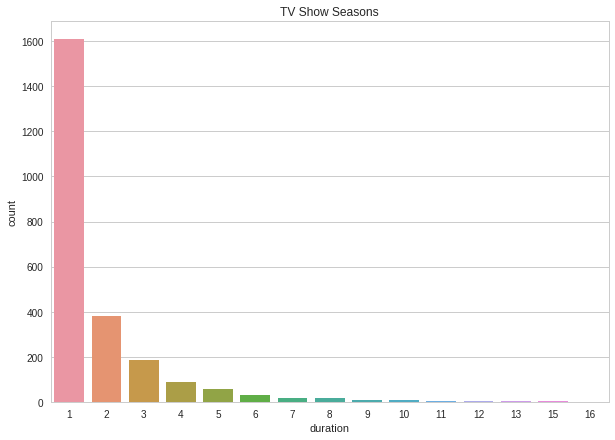

In [ ]:
# For TV Show
plt.figure(figsize=(10,7))
sns.countplot(netflix_tvshow_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int))
plt.title('TV Show Seasons')

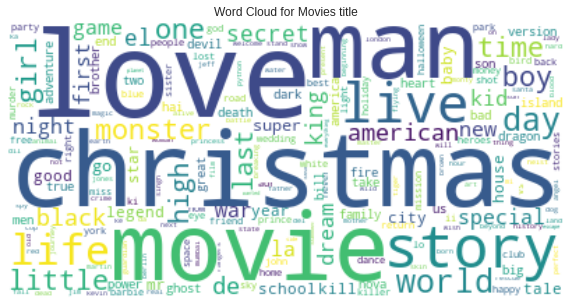

In [ ]:
# Word cloud for movie titles
# Keeping the default stopwords set
ignore_set = set(STOPWORDS)
GetWordCloud('title',netflix_movie_df,ignore_set,'Movies')

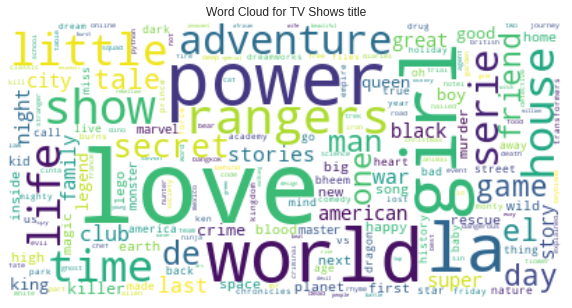

In [ ]:
# Word cloud for tv shows titles
# Keeping the default stopwords set
ignore_set = set(STOPWORDS)
GetWordCloud('title',netflix_tvshow_df,ignore_set,'TV Shows')

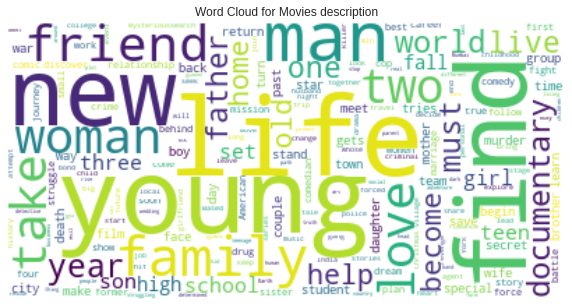

In [ ]:
# Word cloud for movie descriptions
# Keeping the default stopwords set
ignore_set = set(STOPWORDS)
GetWordCloud('description',netflix_movie_df,ignore_set,'Movies')

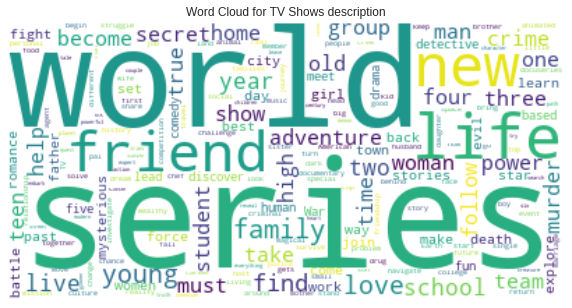

In [ ]:
# Word cloud for tv shows description
# Keeping the default stopwords set
ignore_set = set(STOPWORDS)
GetWordCloud('description',netflix_tvshow_df,ignore_set,'TV Shows')

# 2.2 Bi-variate Analysis

In [ ]:
# Ratings vs Genres
# Making temp df with only genre and ratings seperately for movie/tvshow

temp_movie_df = pd.DataFrame()
temp_movie_df['rating'] = netflix_movie_df['rating']
temp_movie_df['listed_in'] = netflix_movie_df['listed_in']

# converting listed_in column to list of genres
temp_movie_df['listed_in'] = temp_movie_df['listed_in'].str.split(', ')

# Seperating each genre
temp_movie_df = temp_movie_df.explode('listed_in')
temp_movie_df.head()

,rating,listed_in
1,TV-MA,Dramas
1,TV-MA,International Movies
2,R,Horror Movies
2,R,International Movies
3,PG-13,Action & Adventure


Text(0.5, 1.0, 'Movie ratings for top 5 genres')

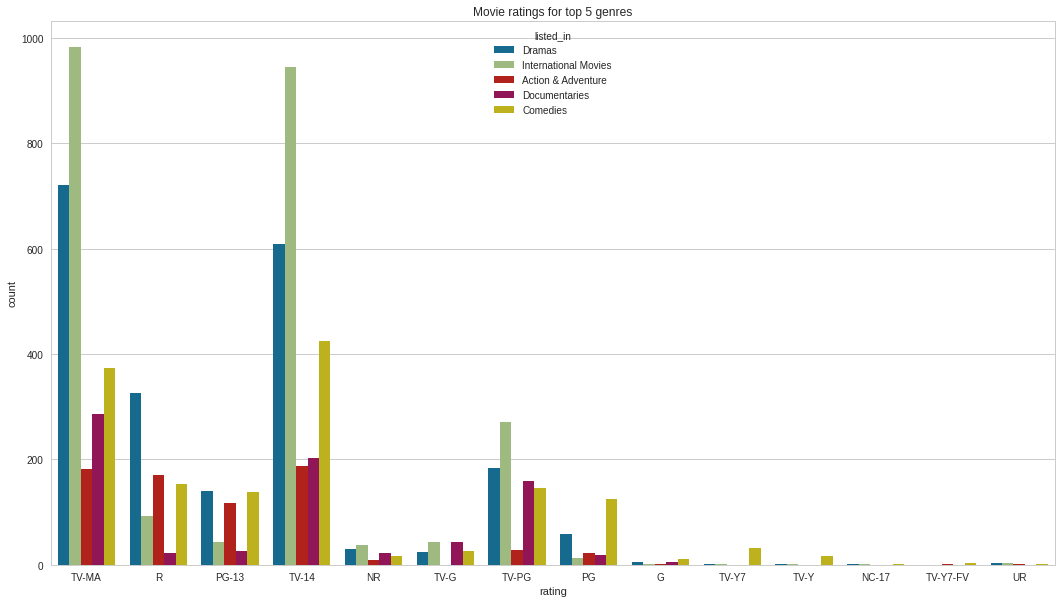

In [ ]:
# Ratings for top 5 genres
top_5_movie_genres=list(temp_movie_df['listed_in'].value_counts().index[:5])
temp_movie_df_top5genre = temp_movie_df[temp_movie_df['listed_in'].isin(top_5_movie_genres)]
plt.figure(figsize=(18,10))
sns.countplot(temp_movie_df_top5genre['rating'],hue=temp_movie_df_top5genre['listed_in'])
plt.title('Movie ratings for top 5 genres')

Text(0.5, 1.0, 'Movie genres for top 5 ratings')

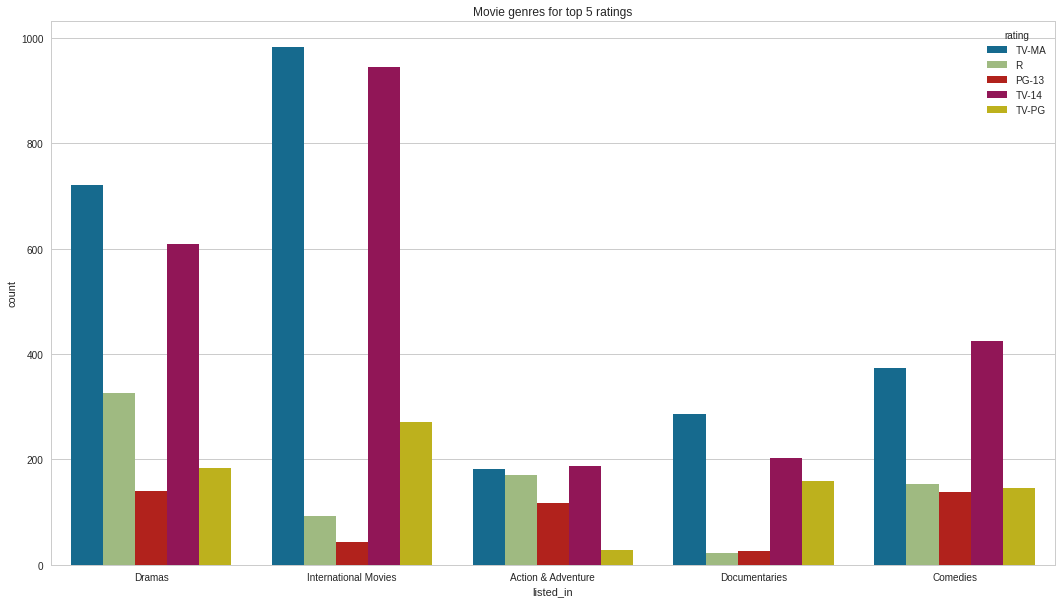

In [ ]:
# Top 5 Genres for top 5 ratings
top_5_movie_ratings=list(temp_movie_df['rating'].value_counts().index[:5])
temp_movie_df_top5rating = temp_movie_df_top5genre[temp_movie_df_top5genre['rating'].isin(top_5_movie_ratings)]
plt.figure(figsize=(18,10))
sns.countplot(temp_movie_df_top5rating['listed_in'],hue=temp_movie_df_top5rating['rating'])
plt.title('Movie genres for top 5 ratings')

In [ ]:
# Doing same for TV Shows

temp_show_df = pd.DataFrame()
temp_show_df['rating'] = netflix_tvshow_df['rating']
temp_show_df['listed_in'] = netflix_tvshow_df['listed_in']

# converting listed_in column to list of genres
temp_show_df['listed_in'] = temp_show_df['listed_in'].str.split(', ')

# Seperating each genre
temp_show_df = temp_show_df.explode('listed_in')
temp_show_df.head()

,rating,listed_in
0,TV-MA,International TV Shows
0,TV-MA,TV Dramas
0,TV-MA,TV Sci-Fi & Fantasy
5,TV-MA,International TV Shows
5,TV-MA,TV Dramas


Text(0.5, 1.0, 'TV Show ratings for top 5 genres')

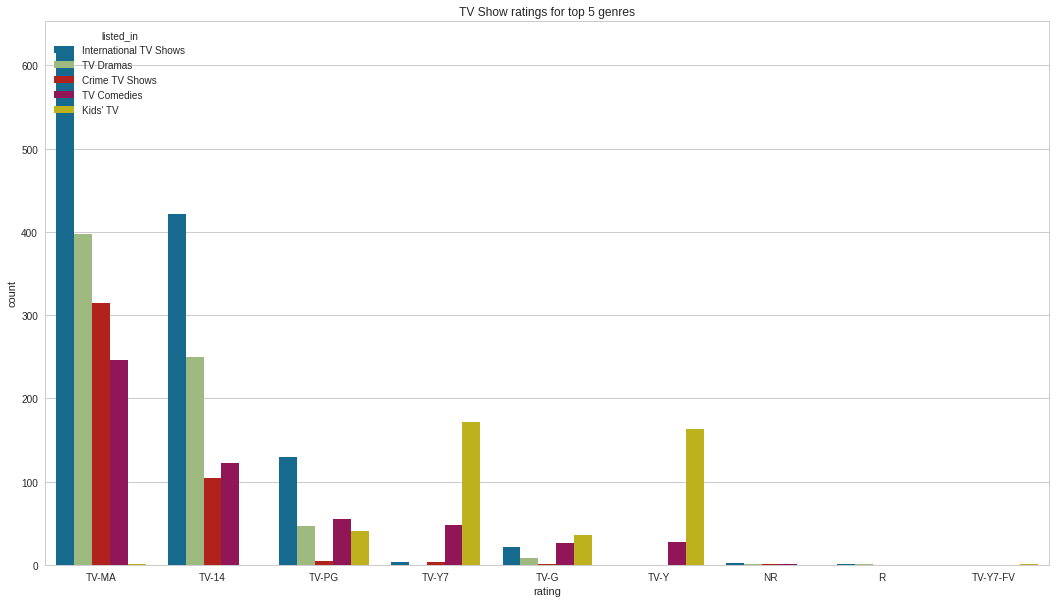

In [ ]:
# Ratings for top 5 genres
top_5_show_genres=list(temp_show_df['listed_in'].value_counts().index[:5])
temp_show_df_top5genre = temp_show_df[temp_show_df['listed_in'].isin(top_5_show_genres)]
plt.figure(figsize=(18,10))
sns.countplot(temp_show_df_top5genre['rating'],hue=temp_show_df_top5genre['listed_in'])
plt.title('TV Show ratings for top 5 genres')

Text(0.5, 1.0, 'TV Show genres for top 5 ratings')

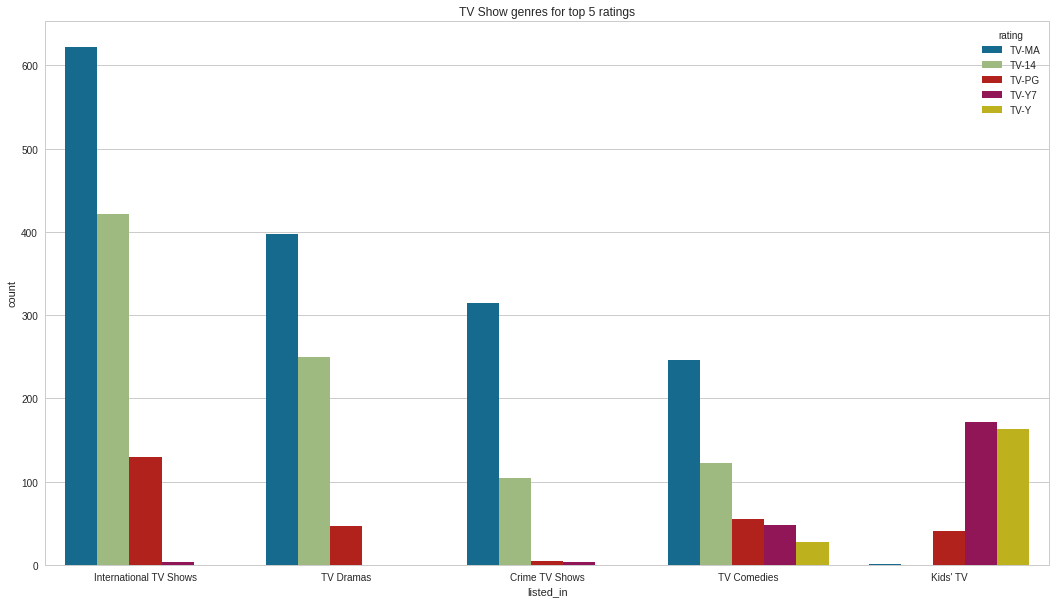

In [ ]:
# Top 5 Genres for top 5 ratings
top_5_show_ratings=list(temp_show_df['rating'].value_counts().index[:5])
temp_show_df_top5rating = temp_show_df_top5genre[temp_show_df_top5genre['rating'].isin(top_5_show_ratings)]
plt.figure(figsize=(18,10))
sns.countplot(temp_show_df_top5rating['listed_in'],hue=temp_show_df_top5rating['rating'])
plt.title('TV Show genres for top 5 ratings')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


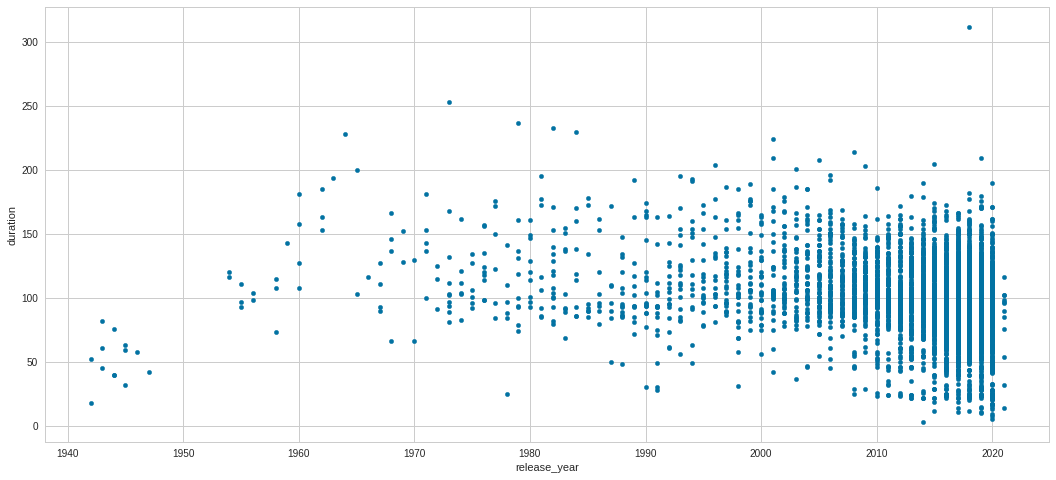

In [ ]:
# Movies Duration vs release year
temp_movie_df = pd.DataFrame()
temp_movie_df['release_year'] = netflix_movie_df['release_year']
temp_movie_df['duration'] = netflix_movie_df['duration'].str.replace(" min", "").astype(int)
fig, ax = plt.subplots(figsize=(18, 8))
temp_movie_df.plot.scatter(x='release_year', y='duration', ax=ax)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


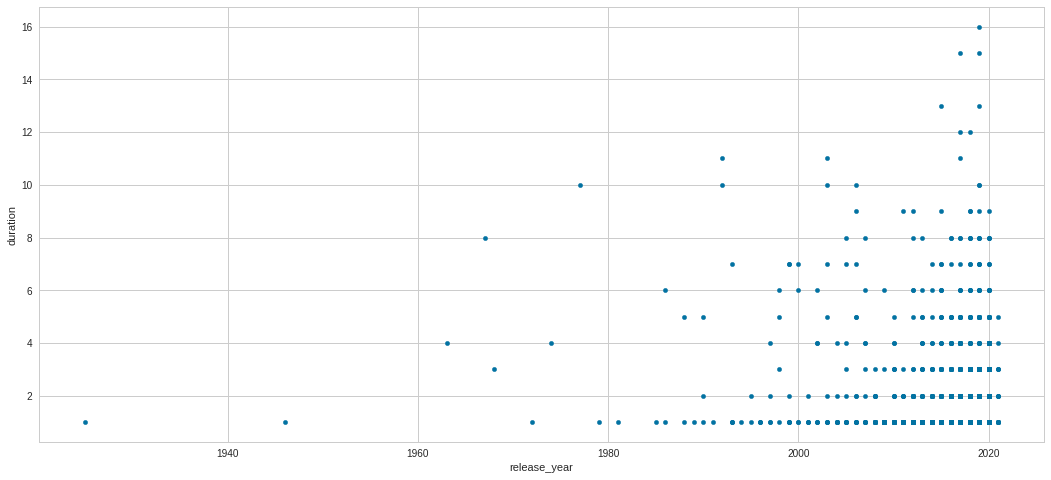

In [ ]:
# TV show seasons length vs release year
temp_show_df = pd.DataFrame()
temp_show_df['release_year'] = netflix_tvshow_df['release_year']
temp_show_df['duration'] = netflix_tvshow_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)
fig, ax = plt.subplots(figsize=(18, 8))
temp_show_df.plot.scatter(x='release_year', y='duration', ax=ax)
plt.show()

In [ ]:
temp_movie_df

,release_year,duration
1,2016,93
2,2011,78
3,2009,80
4,2008,123
6,2019,95
...,...,...
7781,2006,88
7782,2005,99
7783,2015,111
7784,2019,44


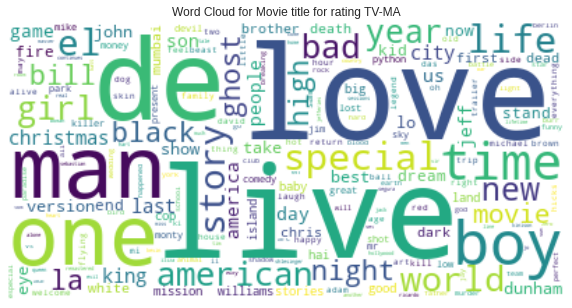

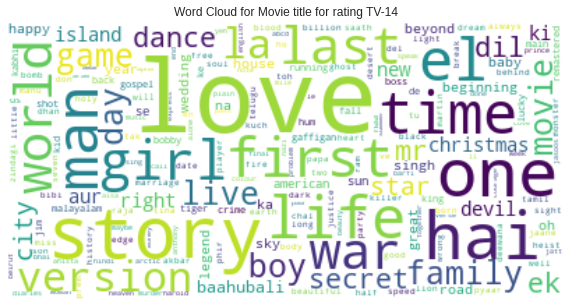

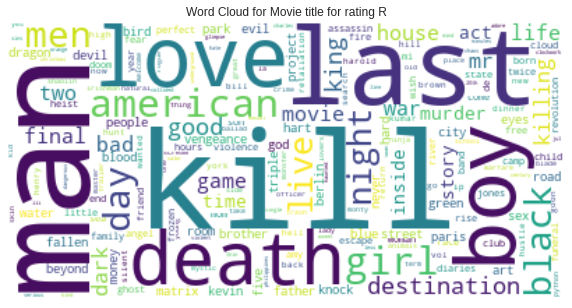

In [ ]:
# Word cloud 
# Movie title for diff ratings
# We will plot word cloud for top 5 ratings
temp_movie_df = pd.DataFrame()
temp_movie_df['title'] = netflix_movie_df['title']
temp_movie_df['rating'] = netflix_movie_df['rating']
top_3_movie_ratings = temp_movie_df['rating'].value_counts().index[:3]
temp_movie_df = temp_movie_df[temp_movie_df['rating'].isin(top_3_movie_ratings)]

# Word cloud
for rating in top_3_movie_ratings:
  df_r = temp_movie_df[temp_movie_df['rating'] == rating]
  text = " ".join(txt for txt in df_r['title'])
  word_cloud = WordCloud(collocations = False,background_color = 'white', stopwords=STOPWORDS).generate(text)
  plt.figure(figsize = (10, 6))
  plt.imshow(word_cloud, interpolation = 'bilinear')
  plt.title(f'Word Cloud for Movie title for rating {rating}')
  plt.axis("off")
  plt.show()

# 2.3 EDA using imdb dataset along with netflix

Text(0.5, 1.0, 'Imdb Ratings for Tv Shows')

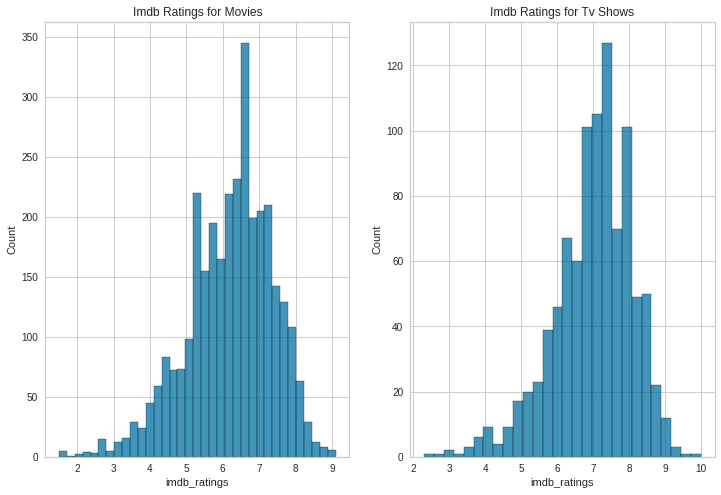

In [ ]:
# Lets check the imdb user ratings for Movies & Tv Shows
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))
sns.histplot(df[df['type']=='Movie']['imdb_ratings'],ax=ax1)
ax1.set_title('Imdb Ratings for Movies')
sns.histplot(df[df['type']=='TV Show']['imdb_ratings'],ax=ax2)
ax2.set_title('Imdb Ratings for Tv Shows')

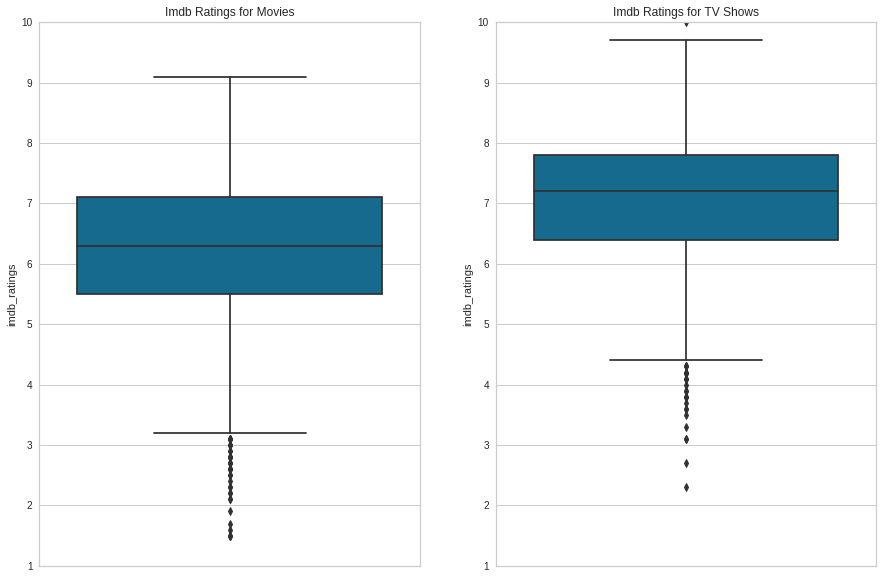

In [ ]:
# Box-plot
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.boxplot(y=df[df['type']=='Movie']['imdb_ratings'])
plt.title(f'Imdb Ratings for Movies')
plt.ylim(1, 10)
plt.subplot(1, 2, 2)
sns.boxplot(y=df[df['type']=='TV Show']['imdb_ratings'])
plt.title(f'Imdb Ratings for TV Shows')
plt.ylim(1, 10)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 0 to 7948
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7949 non-null   object        
 1   type          7949 non-null   object        
 2   title         7949 non-null   object        
 3   director      7949 non-null   object        
 4   cast          7949 non-null   object        
 5   country       7949 non-null   object        
 6   date_added    7949 non-null   datetime64[ns]
 7   release_year  7949 non-null   int64         
 8   rating        7949 non-null   object        
 9   duration      7949 non-null   object        
 10  listed_in     7949 non-null   object        
 11  description   7949 non-null   object        
 12  imdb_ratings  4137 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 869.4+ KB


In [ ]:
# Removing nulls based on IMDb ratings
df_imdb_ratings = df.dropna(axis=0).reset_index(drop=True)
df_imdb_ratings.shape

(4137, 13)

In [ ]:
df_imdb_ratings['type'].value_counts()

Movie      3187
TV Show     950
Name: type, dtype: int64

In [ ]:
# Seperating TVshow & Movies
df_imdb_movie = df_imdb_ratings[df_imdb_ratings['type']=='Movie']
df_imdb_tvshow = df_imdb_ratings[df_imdb_ratings['type']=='TV Show']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

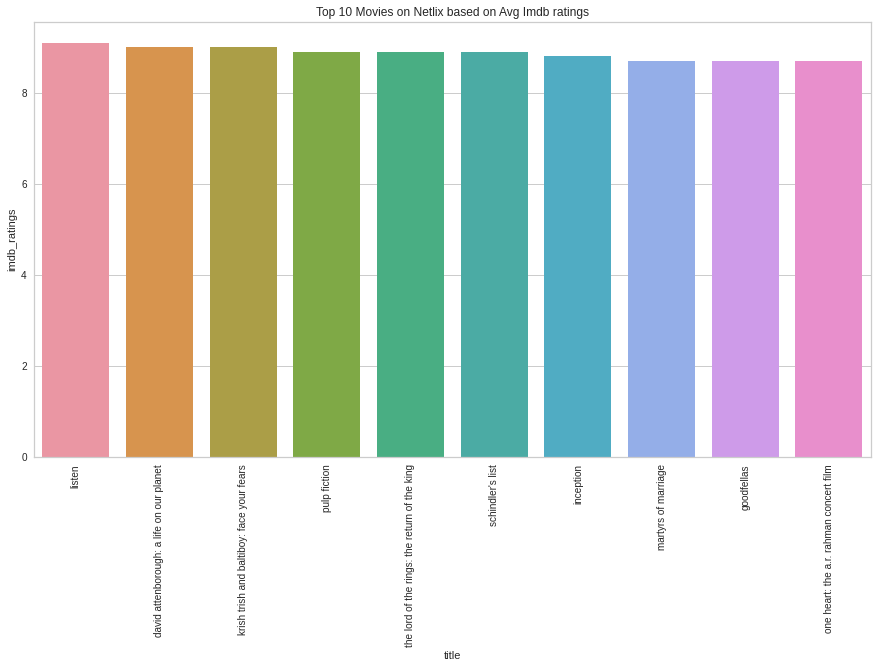

In [ ]:
# Top 10 movies based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['title'] = df_imdb_movie['title']
temp_df['imdb_ratings'] = df_imdb_movie['imdb_ratings']
temp_df.sort_values('imdb_ratings',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['title'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top 10 Movies on Netlix based on Avg Imdb ratings')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

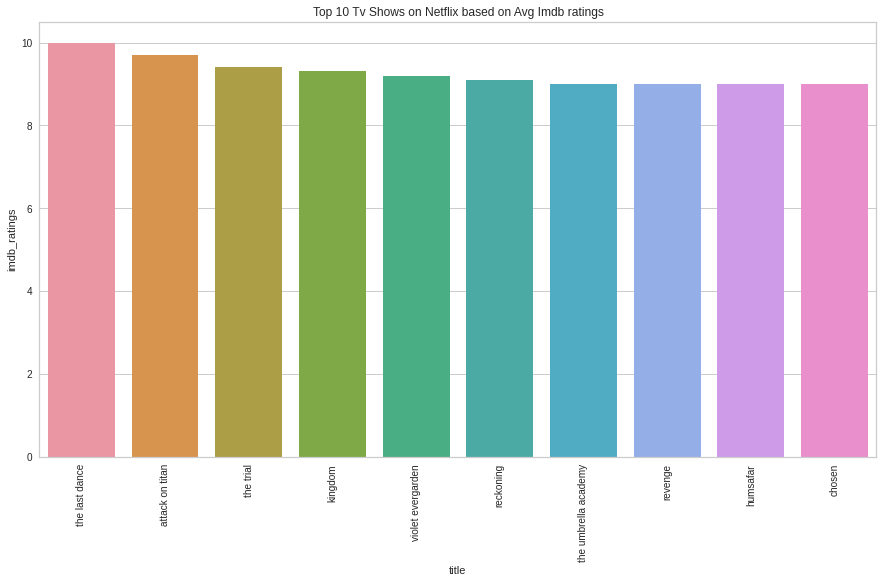

In [ ]:
# Top 10 Tv Show based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['title'] = df_imdb_tvshow['title']
temp_df['imdb_ratings'] = df_imdb_tvshow['imdb_ratings']
temp_df.sort_values('imdb_ratings',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['title'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top 10 Tv Shows on Netflix based on Avg Imdb ratings')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 5 Movie Genre based on Avg Imdb ratings')

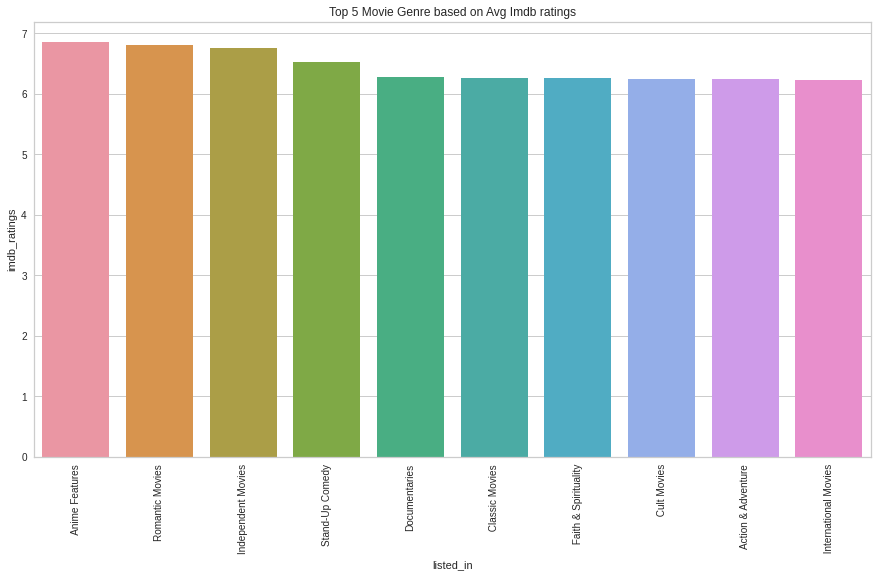

In [ ]:
# Top Movie genres based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['listed_in'] = [x.strip('()').split(',') for x in df_imdb_movie['listed_in']]
temp_df['imdb_ratings'] = df_imdb_movie['imdb_ratings']
temp_df = temp_df.explode('listed_in',ignore_index=True)
temp_df = pd.DataFrame(temp_df.groupby('listed_in')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['listed_in'],y=temp_df.head(10)['imdb_ratings'])
plt.xticks(rotation=90)
plt.title('Top 5 Movie Genre based on Avg Imdb ratings')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

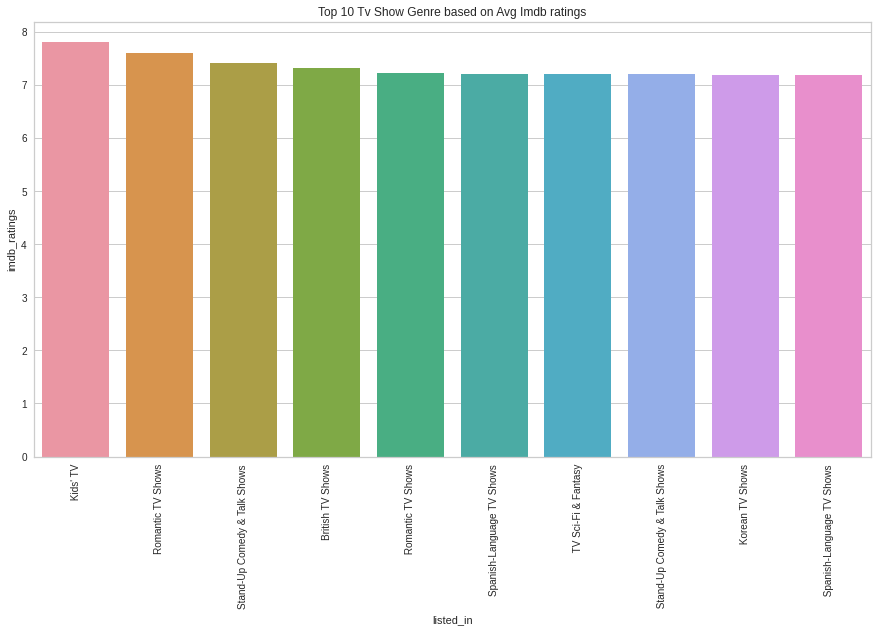

In [ ]:
# Top TV Show genres based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['listed_in'] = [x.strip('()').split(',') for x in df_imdb_tvshow['listed_in']]
temp_df['imdb_ratings'] = df_imdb_tvshow['imdb_ratings']
temp_df = temp_df.explode('listed_in',ignore_index=True)
temp_df = pd.DataFrame(temp_df.groupby('listed_in')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['listed_in'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top 10 Tv Show Genre based on Avg Imdb ratings')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

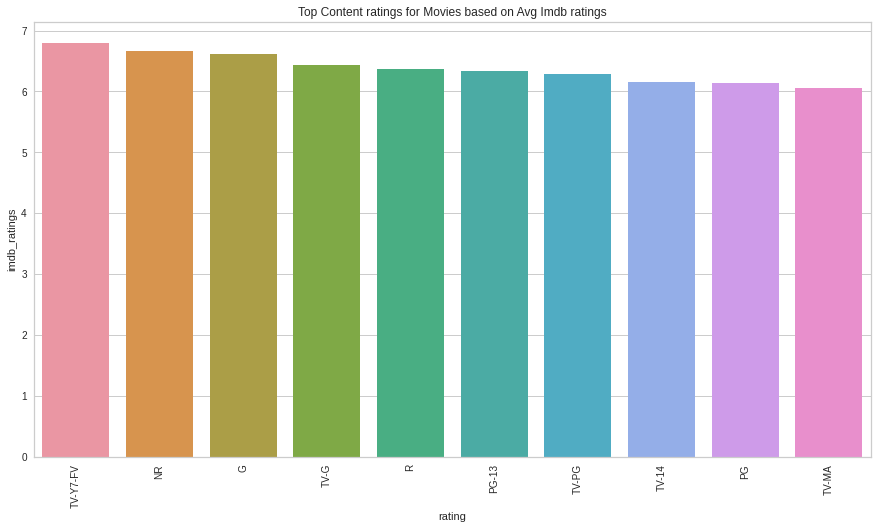

In [ ]:
# Content ratings vs Imdb for movies
temp_df = pd.DataFrame()
temp_df['rating'] = df_imdb_movie['rating']
temp_df['imdb_ratings'] = df_imdb_movie['imdb_ratings']
temp_df = pd.DataFrame(temp_df.groupby('rating')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['rating'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top Content ratings for Movies based on Avg Imdb ratings')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

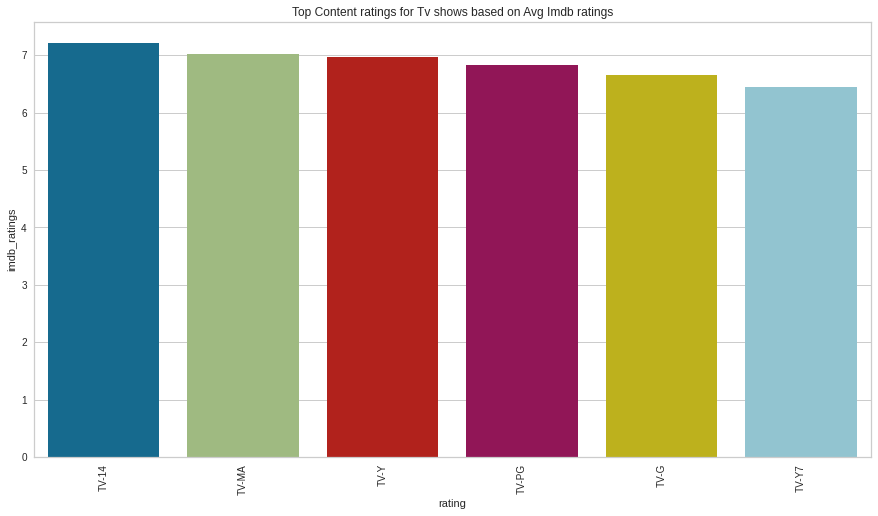

In [ ]:
# Content ratings vs Imdb for Tv shows
temp_df = pd.DataFrame()
temp_df['rating'] = df_imdb_tvshow['rating']
temp_df['imdb_ratings'] = df_imdb_tvshow['imdb_ratings']
temp_df = pd.DataFrame(temp_df.groupby('rating')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['rating'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top Content ratings for Tv shows based on Avg Imdb ratings')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

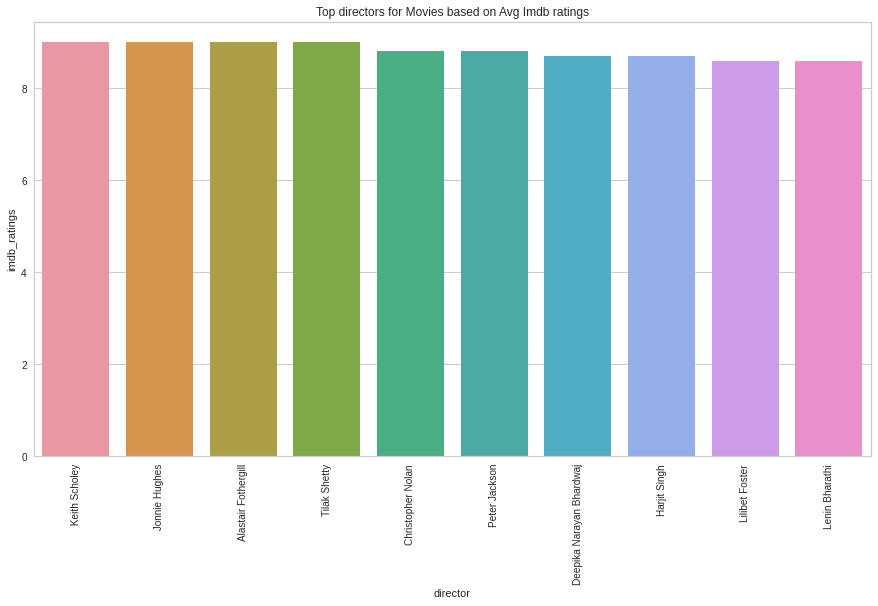

In [ ]:
# Top directors based on Imdb Ratings for Movies
temp_df = pd.DataFrame()
temp_df['director'] = df_imdb_movie['director']
temp_df['imdb_ratings'] = df_imdb_movie['imdb_ratings']
temp_df = temp_df[temp_df['director']!='']
temp_df.reset_index(drop=True)
temp_df['director'] = [x.strip('()').split(',') for x in temp_df['director']]
temp_df = temp_df.explode('director',ignore_index=True)
temp_df = pd.DataFrame(temp_df.groupby('director')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
temp_df.head()

plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['director'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top directors for Movies based on Avg Imdb ratings')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

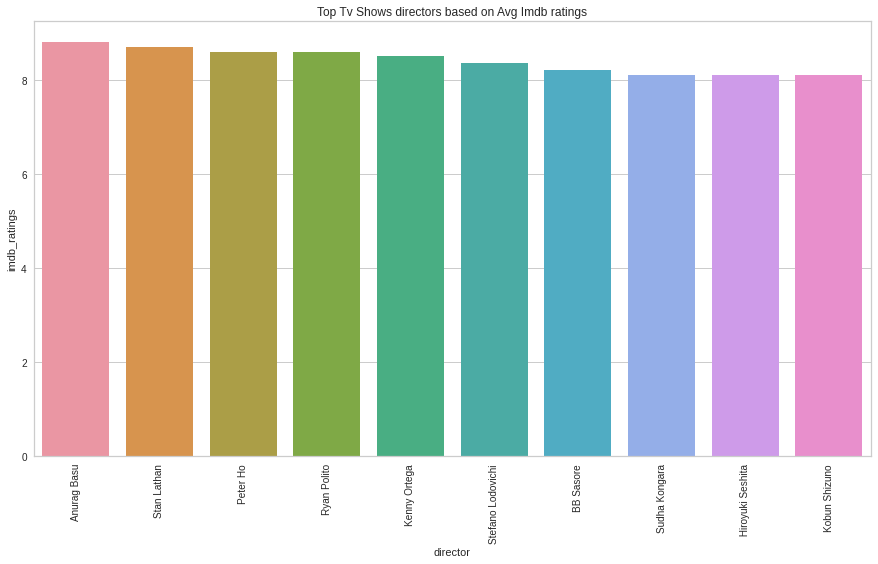

In [ ]:
# Top directors based on Imdb Ratings for Tv Shows
temp_df = pd.DataFrame()
temp_df['director'] = df_imdb_tvshow['director']
temp_df['imdb_ratings'] = df_imdb_tvshow['imdb_ratings']
temp_df = temp_df[temp_df['director']!='']
temp_df.reset_index(drop=True)
temp_df['director'] = [x.strip('()').split(',') for x in temp_df['director']]
temp_df = temp_df.explode('director',ignore_index=True)
temp_df = pd.DataFrame(temp_df.groupby('director')['imdb_ratings'].mean()).sort_values('imdb_ratings',ascending=False).reset_index()
temp_df.head()

plt.figure(figsize=(15,8))
sns.barplot(x=temp_df.head(10)['director'],y=temp_df.head(10)['imdb_ratings'])
plt.title('Top Tv Shows directors based on Avg Imdb ratings')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Movie Duration for top 10 movies based in Imdb Ratings')

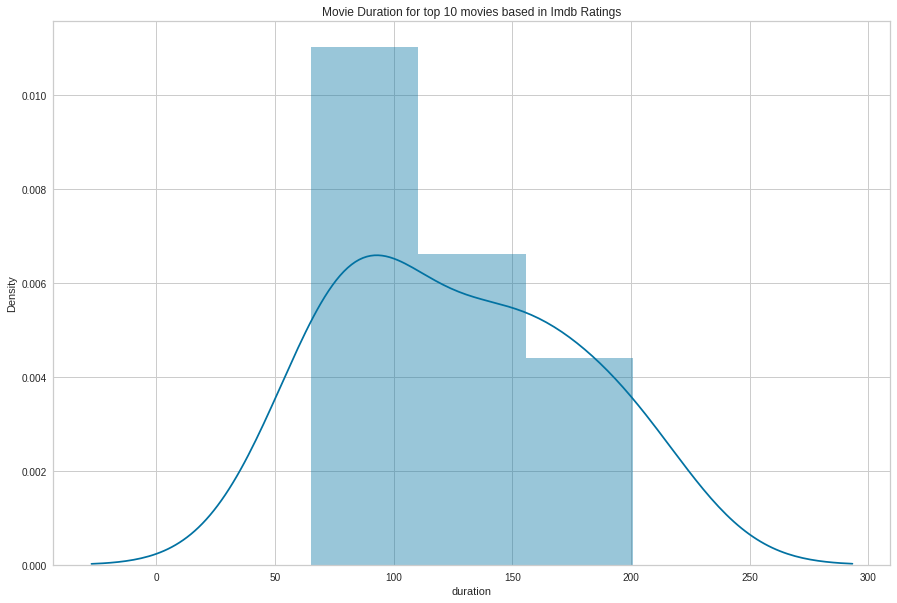

In [ ]:
# Lets check the movie durations of top10 movies based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['duration'] = df_imdb_movie['duration']
temp_df['imdb_ratings'] = df_imdb_movie['imdb_ratings']
temp_df.sort_values('imdb_ratings',ascending=False,inplace=True)
temp_df = temp_df[:10]
plt.figure(figsize=(15,10))
sns.distplot(temp_df['duration'].str.replace(" min", "").astype(int))
plt.title('Movie Duration for top 10 movies based in Imdb Ratings')

Text(0.5, 1.0, 'Season length for top 10 Shows based in Imdb Ratings')

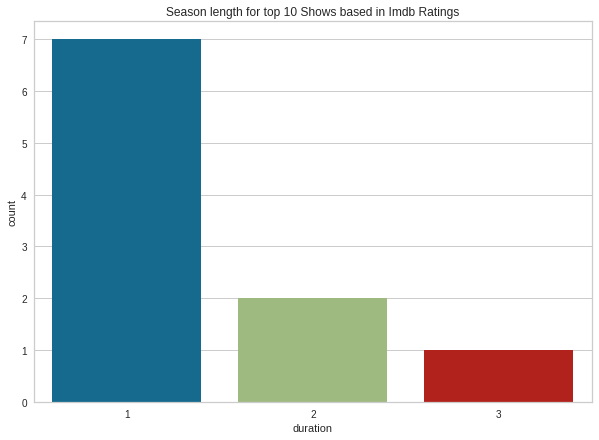

In [ ]:
# Lets check the Tv Show season lengths for top10 shows based on Imdb ratings
temp_df = pd.DataFrame()
temp_df['duration'] = df_imdb_tvshow['duration']
temp_df['imdb_ratings'] = df_imdb_tvshow['imdb_ratings']
temp_df.sort_values('imdb_ratings',ascending=False,inplace=True)
temp_df = temp_df[:10]
plt.figure(figsize=(10,7))
sns.countplot(temp_df['duration'].str.replace(" Season", "").str.replace("s", "").astype(int))
plt.title('Season length for top 10 Shows based in Imdb Ratings')